In [171]:
import numpy as np
import pandas as pd
from collections import Counter
from functools import reduce

import seaborn as sns
import matplotlib.pyplot as plt

from tqdm import tqdm_notebook
tqdm_notebook().pandas()

In [2]:
df = pd.read_pickle("Data/final_results.pkl")

In [3]:
df

,Title,Artist,Genre,URL,Hits,Chords,Lyrics,TokenizedLyrics,tf_idf,lexical_complexity,Chords_df,interval_sequence,comp1,comp2,harmonic_complexity
0,Hallelujah,Jeff Buckley,Rock,https://tabs.ultimate-guitar.com/tab/jeff_buck...,23157554,"[C, Am, C, Am, C, Am, C, Am, F, G, C, G, C, F,...",i heard there was a secret chord that david pl...,"[heard, secret, chord, david, played, pleased,...","{'heard': 0.06606076697293795, 'secret': 0.088...",0.090656,chord root minor major 7th major 7th...,"[-9.0, 9.0, -9.0, 9.0, -9.0, 9.0, -9.0, 4.0, -...",1.127119,0.042017,-3.050021
1,Im Yours,Jason Mraz,Rock,https://tabs.ultimate-guitar.com/tab/jason_mra...,16413451,"[G, D, Em, C, G, D, Em, C, G, D, Em, C, G, D, ...","well you done done me and you bet i felt it, i...","[well, done, done, bet, felt, it,, tried, chil...","{'don': 0.06749892525209408, 'music': 0.053827...",0.075719,chord root minor major 7th major 7th ...,"[5.0, -2.0, 4.0, -7.0, 5.0, -2.0, 4.0, -7.0, 5...",1.180556,0.082192,-2.332715
2,Wonderwall,Oasis,Rock,https://tabs.ultimate-guitar.com/tab/oasis/won...,12091872,"[Em7, G, Dsus4, A7sus4, Em7, G, Dsus4, A7sus4,...",today is gonna be the day that they're gonna t...,"[today, gonna, day, they're, gonna, throw, bac...","{'heard': 0.04545112221889412, 'don': 0.103286...",0.107676,chord root minor major 7th major 7...,"[-3.0, 5.0, -7.0, 5.0, -3.0, 5.0, -7.0, 5.0, -...",15.333333,0.084416,0.258026
3,Wish You Were Here,Pink Floyd,Rock,https://tabs.ultimate-guitar.com/tab/pink_floy...,10529033,"[Em7, G, Em7, G, Em7, A7sus4, Em7, A7sus4, G, ...","so, so you think you can tell, heaven from hel...","[so,, think, tell,, heaven, hell,, blue, skies...","{'cold': 0.17738530760119117, 're': 0.04458131...",0.133181,chord root minor major 7th major 7t...,"[-3.0, 3.0, -3.0, 3.0, -5.0, 5.0, -5.0, 2.0, 7...",6.420000,0.137255,-0.126497
4,Hey Soul Sister,Train,Rock,https://tabs.ultimate-guitar.com/tab/train/hey...,10423751,"[C, G, Am, F, C, G, Am, F, C, G, Am, F, G, C, ...",your lipstick stains on the front lobe of my l...,"[lipstick, stains, front, lobe, left, side, br...","{'don': 0.045072174119906036, 'you': 0.0604750...",0.102255,chord root minor major 7th major 7th...,"[-7.0, -2.0, 4.0, 5.0, -7.0, -2.0, 4.0, 5.0, -...",0.267857,0.035398,-4.658395
5,Wonderwall,Oasis,Rock,https://tabs.ultimate-guitar.com/tab/oasis/won...,9452644,"[F#m, A, Esus4, B, F#m, A, Esus4, B, F#m, A, E...",today is gonna be the day that they're gonna t...,"[today, gonna, day, they're, gonna, throw, bac...","{'heard': 0.03935016847613902, 'don': 0.089422...",0.102723,chord root minor major 7th major 7t...,"[-3.0, 5.0, -7.0, 5.0, -3.0, 5.0, -7.0, 5.0, -...",2.065089,0.029412,-2.801187
6,The Only Exception,Paramore,Rock,https://tabs.ultimate-guitar.com/tab/paramore/...,9420989,"[G, Dm, Cmaj7, G, Dm, Cmaj7, G, Dm, Cmaj7, G, ...",when i was younger i saw my daddy cry and curs...,"[younger, saw, daddy, cry, curse, wind, mama, ...","{'you': 0.011730649469387785, 'like': 0.013389...",0.046701,chord root minor major 7th major 7th...,"[5.0, 2.0, -7.0, 5.0, 2.0, -7.0, 5.0, 2.0, -7....",4.840580,0.100000,-0.725551
7,Love Story,Taylor Swift,Rock,https://tabs.ultimate-guitar.com/tab/taylor_sw...,8964458,"[C, G, Am, F, C, F, Am, F, C, F, Am, G, F, G, ...",we were both young when i first saw you i clos...,"[young, first, saw, close, eyes, flashback, st...","{'don': 0.08138220859348926, 'really': 0.03751...",0.078454,chord root minor major 7th major 7th ...,"[-7.0, -2.0, 4.0, 5.0, -5.0, -4.0, 4.0, 5.0, -...",0.455696,0.087500,-3.222045
8,Iris,Goo Goo Dolls,Rock,https://tabs.ultimate-guitar.com/tab/goo_goo_d...,8841766,"[Bm, Bsus2, G, D, Em, G, Bm, A, G, D, Em, G, B...",and i'd give up forever to touch you 'cause i ...,"[i'd, give, forever, touch, 'cause, know, feel...","{'don': 0.27428864541810055, 'you': 0.06133729...",0.114617,chord root minor major 7th major 7t...,"[-0.0, 4.0, 5.0, -2.0, -3.0, -4.0, 2.0, 2.0, 5...",2.490446,0.050633,-2.070692
9,Let It Be,The Beatles,Rock,https://tabs.ultima

In [164]:
df['chord_bigrams'] = df.Chords.apply(lambda cl : list(zip(cl,cl[1:])))

In [13]:
all_bigrams = [bigram for cl in df['chord_bigrams'].values for bigram in cl]

In [14]:
nb_bigrams = len(all_bigrams)

In [15]:
freq = Counter(all_bigrams)
for key in freq:
    freq[key] /= nb_bigrams

In [16]:
freq

Counter({('C', 'Am'): 0.010683922974485172,
         ('Am', 'C'): 0.011385213653142138,
         ('Am', 'F'): 0.018071526585752406,
         ('F', 'G'): 0.014208098514884072,
         ('G', 'C'): 0.026613601494736523,
         ('C', 'G'): 0.042573660838612,
         ('C', 'F'): 0.010833295357303803,
         ('G', 'Am'): 0.01976525750279757,
         ('G', 'E7'): 0.00035950641288552,
         ('E7', 'Am'): 0.0015215729165084333,
         ('F', 'Am'): 0.00899019205744001,
         ('F', 'C'): 0.02290460927729084,
         ('G', 'D'): 0.03240874360103902,
         ('D', 'Em'): 0.015395482371527092,
         ('Em', 'C'): 0.017666448937430693,
         ('C', 'A7'): 0.0003114034421473166,
         ('A7', 'G'): 0.00020000708885884564,
         ('G', 'G'): 0.008352194761333313,
         ('G', 'Bm'): 0.00564576972348387,
         ('Bm', 'Em'): 0.0020861498888568204,
         ('Em', 'D'): 0.010633288268444958,
         ('D', 'C'): 0.011154825740659163,
         ('Em7', 'G'): 0.00116206650362291

In [17]:
freq.most_common(20)

[(('C', 'G'), 0.042573660838612),
 (('G', 'D'), 0.03240874360103902),
 (('G', 'C'), 0.026613601494736523),
 (('F', 'C'), 0.02290460927729084),
 (('D', 'G'), 0.02110454547756123),
 (('G', 'Am'), 0.01976525750279757),
 (('Am', 'F'), 0.018071526585752406),
 (('Em', 'C'), 0.017666448937430693),
 (('D', 'A'), 0.01625627237421073),
 (('D', 'Em'), 0.015395482371527092),
 (('Am', 'G'), 0.014392915191930854),
 (('F', 'G'), 0.014208098514884072),
 (('C', 'D'), 0.013349840247502444),
 (('G', 'F'), 0.011729529654215592),
 (('Am', 'C'), 0.011385213653142138),
 (('G', 'Em'), 0.011382681917840125),
 (('D', 'C'), 0.011154825740659163),
 (('A', 'D'), 0.011048492857974714),
 (('C', 'F'), 0.010833295357303803),
 (('C', 'Am'), 0.010683922974485172)]

In [18]:
df_bg = pd.DataFrame(all_bigrams, columns=["first_chord","second_chord"])
df_bg

,first_chord,second_chord
0,C,Am
1,Am,C
2,C,Am
3,Am,C
4,C,Am
5,Am,C
6,C,Am
7,Am,F
8,F,G
9,G,C


In [52]:
df_bg.groupby(["first_chord","second_chord"]).size()

first_chord  second_chord
A            A               1942
             A#                33
             A#/A               1
             A#dim7             8
             A(7)               1
             A-5               24
             A/Ab               7
             A/B                6
             A/C#              32
             A/D                4
             A/G                4
             A/G#              56
             A11                1
             A2                12
             A5                20
             A5/Gb              1
             A6                44
             A7               296
             A7+               12
             A7/G               3
             A7sus              2
             A7sus4            18
             A9                 8
             AM                 1
             AM7                1
             Aadd9              7
             Aaug              13
             Ab                15
             Ab7      

In [61]:
df_count = pd.DataFrame(df_bg.groupby(["first_chord","second_chord"]).size(), columns=["count"]).reset_index()
df_count

,first_chord,second_chord,count
0,A,A,1942
1,A,A#,33
2,A,A#/A,1
3,A,A#dim7,8
4,A,A(7),1
5,A,A-5,24
6,A,A/Ab,7
7,A,A/B,6
8,A,A/C#,32
9,A,A/D,4


In [68]:
count_array_df = df_count.pivot(index="first_chord", columns="second_chord", values="count").fillna(0).astype(int)
count_array_df

second_chord,A,A#,A#/A,A#/D,A#/F,A#5,A#6/F,A#7,A#7#5,A#M7,...,Gmin7,Gsus,Gsus2,Gsus2/B,Gsus4,H,Hb,Hm,Hm7,С
first_chord,,,,,,,,,,,,,,,,,,,,,
A,1942,33,1,0,0,0,0,0,0,0,...,0,0,0,0,0,2,0,16,0,0
A#,38,39,0,0,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
A#/A,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A#/D,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A#/F,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A#5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A#6/F,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A#7,0,0,0,0,0,0,0,3,1,0,...,0,0,0,0,0,0,0,0,0,0
A#7#5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
prob = df_bg.groupby(["first_chord","second_chord"]).size() / df_bg.groupby("first_chord").size()
prob

first_chord  second_chord
A            A               0.080059
             A#              0.001360
             A#/A            0.000041
             A#dim7          0.000330
             A(7)            0.000041
             A-5             0.000989
             A/Ab            0.000289
             A/B             0.000247
             A/C#            0.001319
             A/D             0.000165
             A/G             0.000165
             A/G#            0.002309
             A11             0.000041
             A2              0.000495
             A5              0.000825
             A5/Gb           0.000041
             A6              0.001814
             A7              0.012203
             A7+             0.000495
             A7/G            0.000124
             A7sus           0.000082
             A7sus4          0.000742
             A9              0.000330
             AM              0.000041
             AM7             0.000041
             Aadd9      

In [26]:
# sanity check 
np.allclose(prob.sum(level=0),1)

True

In [27]:
df_prob = pd.DataFrame(prob, columns=["prob"]).reset_index()
df_prob

,first_chord,second_chord,prob
0,A,A,0.080059
1,A,A#,0.001360
2,A,A#/A,0.000041
3,A,A#dim7,0.000330
4,A,A(7),0.000041
5,A,A-5,0.000989
6,A,A/Ab,0.000289
7,A,A/B,0.000247
8,A,A/C#,0.001319
9,A,A/D,0.000165


In [28]:
prob_array_df = df_prob.pivot(index="first_chord", columns="second_chord", values="prob")
prob_array_df

second_chord,A,A#,A#/A,A#/D,A#/F,A#5,A#6/F,A#7,A#7#5,A#M7,...,Gmin7,Gsus,Gsus2,Gsus2/B,Gsus4,H,Hb,Hm,Hm7,С
first_chord,,,,,,,,,,,,,,,,,,,,,
A,0.080059,0.001360,0.000041,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.000082,NaN,0.000660,NaN,NaN
A#,0.034420,0.035326,NaN,NaN,NaN,NaN,NaN,0.007246,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A#/A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A#/D,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A#/F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A#5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A#6/F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A#7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.043478,0.014493,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A#7#5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [40]:
all_roots = [ c+a for c in list("ABCDEFG") for a in ["","#",'b'] if (c+a) not in ["B#","Cb","E#","Fb"] ]

In [48]:
all_roots

['A',
 'A#',
 'Ab',
 'B',
 'Bb',
 'C',
 'C#',
 'D',
 'D#',
 'Db',
 'E',
 'Eb',
 'F',
 'F#',
 'G',
 'G#',
 'Gb']

In [77]:
roots_by_fifths = ["C", "G", "D", "A", "E", "B", "F#", "C#", "G#", "D#", "A#", "F"]

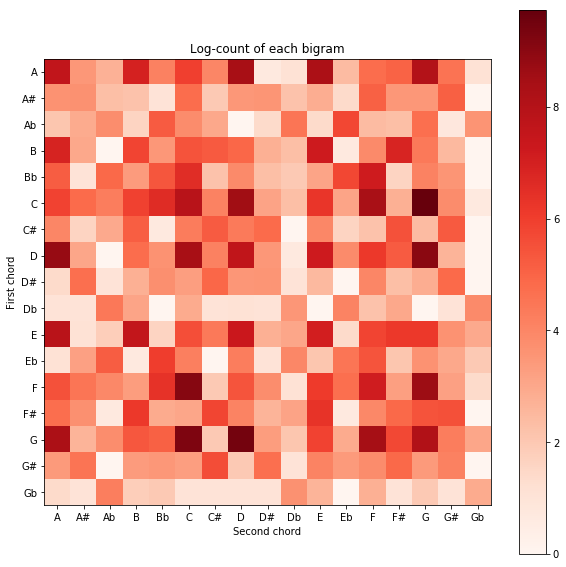

In [76]:
plt.figure(figsize=(10,10))
plt.imshow(np.log(count_array_df, where=count_array_df!=0).loc[all_roots][all_roots], cmap="Reds")
plt.xticks(range(len(all_roots)), all_roots)
plt.yticks(range(len(all_roots)), all_roots)
plt.xlabel("Second chord")
plt.ylabel("First chord")
plt.title("Log-count of each bigram")
plt.colorbar()
plt.show()

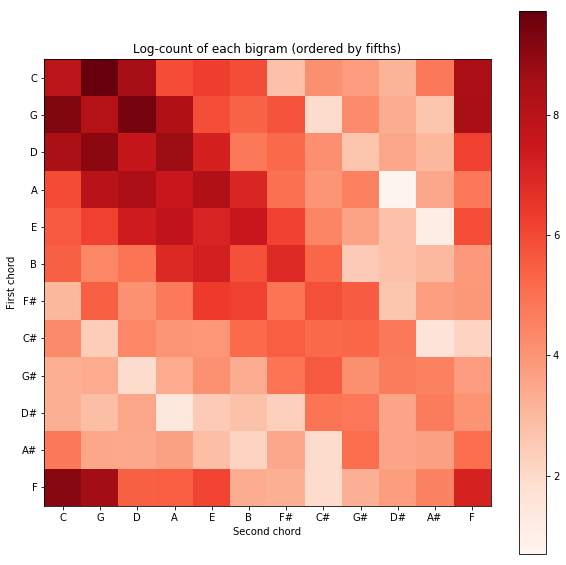

In [78]:
plt.figure(figsize=(10,10))
plt.imshow(np.log(count_array_df, where=count_array_df!=0).loc[roots_by_fifths][roots_by_fifths], cmap="Reds")
plt.xticks(range(len(roots_by_fifths)), roots_by_fifths)
plt.yticks(range(len(roots_by_fifths)), roots_by_fifths)
plt.xlabel("Second chord")
plt.ylabel("First chord")
plt.title("Log-count of each bigram (ordered by fifths)")
plt.colorbar()
plt.show()

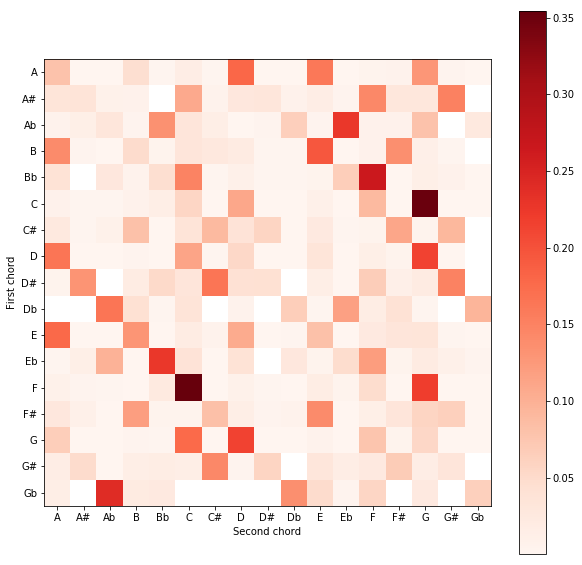

In [51]:
plt.figure(figsize=(10,10))
plt.imshow(prob_array_df.loc[all_roots][all_roots], cmap="Reds")
plt.xticks(range(len(all_roots)), all_roots)
plt.yticks(range(len(all_roots)), all_roots)
plt.xlabel("Second chord")
plt.ylabel("First chord")
plt.title("Probability distributions for each first chord")
plt.colorbar()
plt.show()

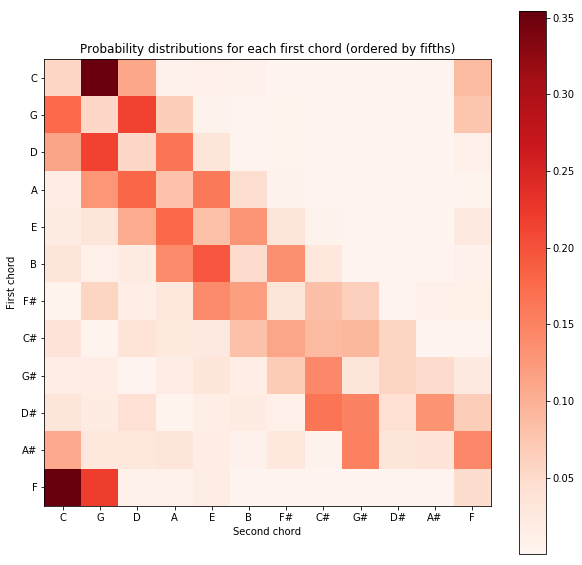

In [80]:
plt.figure(figsize=(10,10))
plt.imshow(prob_array_df.loc[roots_by_fifths][roots_by_fifths], cmap="Reds")
plt.xticks(range(len(roots_by_fifths)), roots_by_fifths)
plt.yticks(range(len(roots_by_fifths)), roots_by_fifths)
plt.xlabel("Second chord")
plt.ylabel("First chord")
plt.title("Probability distributions for each first chord (ordered by fifths)")
plt.colorbar()
plt.show()

In [103]:
df["comp3"] = df.chord_bigrams.apply(lambda bg_list : np.mean([ freq[bg] for bg in bg_list ]))

In [165]:
df.chord_bigrams = df.chord_bigrams.apply(np.array)

In [172]:
df["comp4"] = df.chord_bigrams.progress_apply(lambda bg_list : -np.sum([ np.log(prob_array_df.loc[bg[0]][bg[1]]) for bg in bg_list ]))

0       214.339131
1       141.118227
2       442.276552
3       175.962069
4       179.669043
5       571.630448
6       242.103643
7       135.826770
8       428.074877
9       372.529550
10      182.220405
11      223.461977
12      141.262627
13      431.542478
14      256.282121
15      179.245838
16      360.676860
18      203.642602
19      149.116791
20      376.214989
21      237.336808
22      384.696105
23      266.885627
24      302.185162
25      261.009057
26      163.373620
27      399.289459
28      232.898142
29      226.697250
30      271.088823
           ...    
5165     31.058784
5166     87.718603
5167    312.719754
5169    271.542436
5172     16.155483
5173     51.830718
5175    504.335273
5176     42.943534
5177    155.944412
5178    258.305090
5179     25.918586
5180    259.708868
5181     69.320705
5182    210.133967
5183    137.226072
5184    162.558868
5185    156.948983
5186    103.798511
5187     76.842728
5188     55.938568
5189    215.413673
5190     73.

In [195]:
(df.comp1*df.comp2).describe()

count    4707.000000
mean        0.282079
std         0.671266
min         0.000045
25%         0.025962
50%         0.065847
75%         0.228698
max        10.837931
dtype: float64

In [194]:
(df.comp3*df.comp4).describe()

count    4707.000000
mean        1.694848
std         1.487860
min         0.000305
25%         0.450730
50%         1.412777
75%         2.552376
max        13.096811
dtype: float64

In [192]:
df.comp4.describe()

count    4707.000000
mean      218.888673
std       123.449130
min         3.854147
25%       135.699093
50%       199.698614
75%       279.658324
max      1244.616097
Name: comp4, dtype: float64

In [198]:
df["harmonic_complexity_4"] = (df.comp1*df.comp2)/np.log(df.comp4)

In [199]:
df.harmonic_complexity_4.describe()

count    4707.000000
mean        0.056434
std         0.139303
min         0.000008
25%         0.004999
50%         0.012839
75%         0.044002
max         2.245065
Name: harmonic_complexity_4, dtype: float64

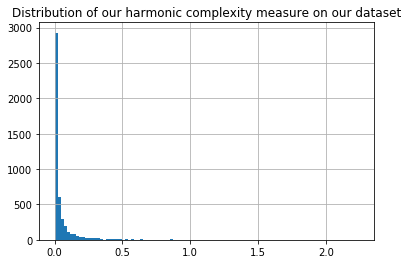

In [200]:
df.harmonic_complexity_4.hist(bins=100)
plt.title("Distribution of our harmonic complexity measure on our dataset")
plt.show()

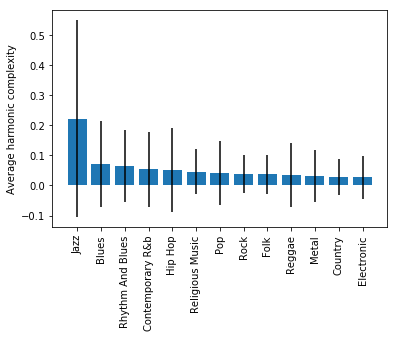

In [202]:
sorted_avg_harmonic_complexity_4 = df.groupby("Genre").harmonic_complexity_4.mean().sort_values(ascending=False)
plt.bar(np.arange(df.Genre.nunique()), sorted_avg_harmonic_complexity_4, yerr=df.groupby("Genre").harmonic_complexity_4.std()[sorted_avg_harmonic_complexity_4.keys()])
plt.xticks(np.arange(df.Genre.nunique()), sorted_avg_harmonic_complexity_4.keys(), rotation=90)
plt.ylabel("Average harmonic complexity")
plt.show()

In [89]:
# dict to associate each genre with a color
genre_to_color = dict(zip(df.Genre.unique(),sns.color_palette("hls", df.Genre.nunique())))

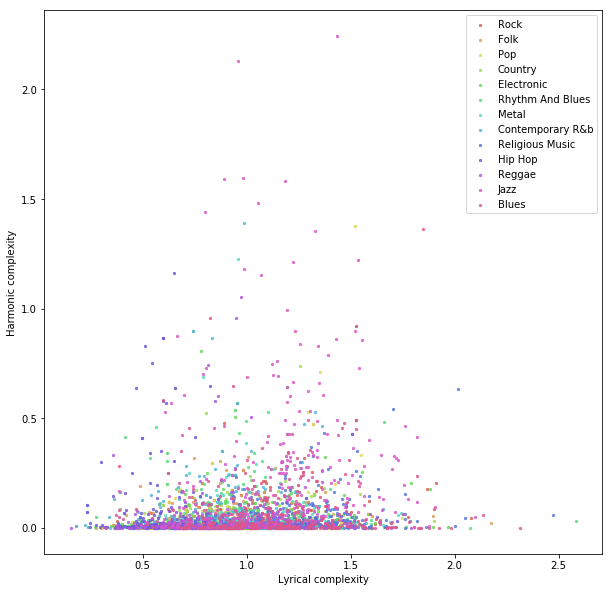

In [203]:
fig, ax = plt.subplots(figsize=(10,10))
for (genre,color) in zip(df.Genre.unique(),sns.color_palette("hls", df.Genre.nunique())):
    ax.scatter(df[df.Genre==genre].lexical_complexity*10, df[df.Genre==genre].harmonic_complexity_4, c=color, label=genre, s=5, alpha=0.8)
plt.xlabel("Lyrical complexity")
plt.ylabel("Harmonic complexity")
plt.legend()
plt.show()

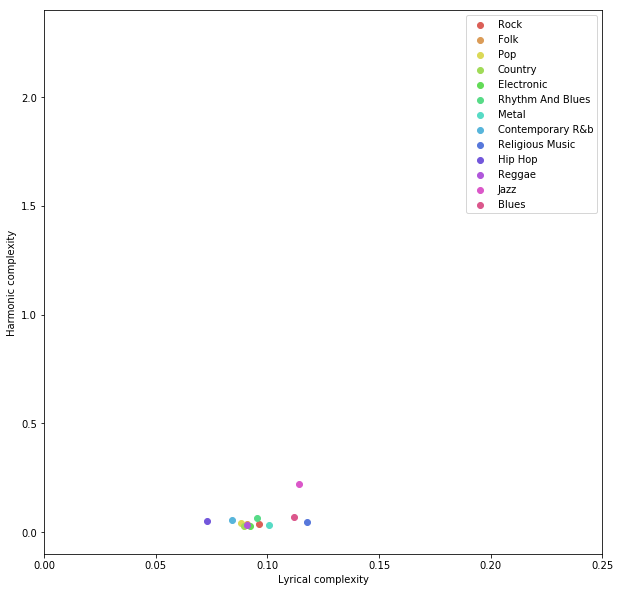

In [207]:
fig, ax = plt.subplots(figsize=(10,10))
for (genre,color) in zip(df.Genre.unique(),sns.color_palette("hls", df.Genre.nunique())):
    df_genre = df[df.Genre==genre]
    ax.scatter(df_genre.lexical_complexity.mean(), df_genre.harmonic_complexity_4.mean(), c=color, label=genre)
plt.xlabel("Lyrical complexity")
plt.ylabel("Harmonic complexity")
plt.xlim(0,0.25)
plt.ylim(-0.1,2.4)
plt.legend()
plt.show()

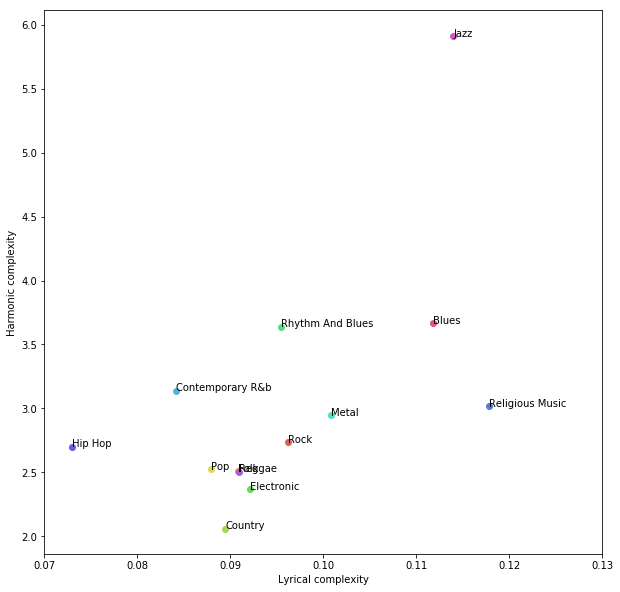

In [208]:
fig, ax = plt.subplots(figsize=(10,10))
for (genre,color) in zip(df.Genre.unique(),sns.color_palette("hls", df.Genre.nunique())):
    df_genre = df[df.Genre==genre]
    ax.scatter(df_genre.lexical_complexity.mean(), df_genre.harmonic_complexity_3.mean(), c=color, label=genre)
    ax.annotate(genre, (df_genre.lexical_complexity.mean(), df_genre.harmonic_complexity_3.mean()))
plt.xlabel("Lyrical complexity")
plt.ylabel("Harmonic complexity")
plt.xlim(0.07,0.13)
plt.show()